In [1]:
# Load in libraries

import warnings
warnings.filterwarnings('ignore')
import os

#libraries for handling data
import pandas as pd
import numpy as np
import math
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()
from sklearn.preprocessing import RobustScaler
rscaler = RobustScaler()
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
import datetime
from datetime import datetime, time

#libraries for data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pylab as pylab
import seaborn as sns

#libaries for modelling
# Regression Modelling Algorithms
import statsmodels.api as sm
#from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor

In [2]:
data_folder = 'C:/Users/reejung/Documents/GitHub/Kaggle - careerVillage'

In [3]:
for file in os.listdir(data_folder):
    print(file)
    
# print(os.listdir('C:/Users/reejung/Documents/GitHub/Kaggle - careerVillage'))

.git
.ipynb_checkpoints
answers.csv
comments.csv
emails.csv
groups.csv
group_memberships.csv
Kaggle - Career Village
matches.csv
professionals.csv
questions.csv
school_memberships.csv
students.csv
tags.csv
tag_questions.csv
tag_users.csv


In [4]:
groups = pd.read_csv('C:/Users/reejung/Documents/GitHub/Kaggle - careerVillage/groups.csv')
group_memberships = pd.read_csv('C:/Users/reejung/Documents/GitHub/Kaggle - careerVillage/group_memberships.csv')
school_memberships = pd.read_csv('C:/Users/reejung/Documents/GitHub/Kaggle - careerVillage/school_memberships.csv')
tags = pd.read_csv('C:/Users/reejung/Documents/GitHub/Kaggle - careerVillage/tags.csv')
answers = pd.read_csv('C:/Users/reejung/Documents/GitHub/Kaggle - careerVillage/answers.csv/answers.csv')
emails = pd.read_csv('C:/Users/reejung/Documents/GitHub/Kaggle - careerVillage/emails.csv/emails.csv')
comments = pd.read_csv('C:/Users/reejung/Documents/GitHub/Kaggle - careerVillage/comments.csv/comments.csv')
questions = pd.read_csv('C:/Users/reejung/Documents/GitHub/Kaggle - careerVillage/questions.csv')
matches = pd.read_csv('C:/Users/reejung/Documents/GitHub/Kaggle - careerVillage/matches.csv')
professionals = pd.read_csv('C:/Users/reejung/Documents/GitHub/Kaggle - careerVillage/professionals.csv')
students = pd.read_csv('C:/Users/reejung/Documents/GitHub/Kaggle - careerVillage/students.csv/students.csv')
tag_questions = pd.read_csv('C:/Users/reejung/Documents/GitHub/Kaggle - careerVillage/tag_questions.csv')
tag_users =pd.read_csv('C:/Users/reejung/Documents/GitHub/Kaggle - careerVillage/tag_users.csv')

In [5]:
df_list = [answers,comments,emails,group_memberships,groups,matches,professionals,questions,school_memberships,students,tag_questions,tag_users,tags]

In [6]:
len(df_list)

13

In [7]:
for table in df_list:
    print(table.columns)

Index(['answers_id', 'answers_author_id', 'answers_question_id',
       'answers_date_added', 'answers_body'],
      dtype='object')
Index(['comments_id', 'comments_author_id', 'comments_parent_content_id',
       'comments_date_added', 'comments_body'],
      dtype='object')
Index(['emails_id', 'emails_recipient_id', 'emails_date_sent',
       'emails_frequency_level'],
      dtype='object')
Index(['group_memberships_group_id', 'group_memberships_user_id'], dtype='object')
Index(['groups_id', 'groups_group_type'], dtype='object')
Index(['matches_email_id', 'matches_question_id'], dtype='object')
Index(['professionals_id', 'professionals_location', 'professionals_industry',
       'professionals_headline', 'professionals_date_joined'],
      dtype='object')
Index(['questions_id', 'questions_author_id', 'questions_date_added',
       'questions_title', 'questions_body'],
      dtype='object')
Index(['school_memberships_school_id', 'school_memberships_user_id'], dtype='object')
Index(['s

In [8]:
def get_meta_info_about_columns_and_tables(df_arr, df_name_arr):
    tables = []
    columns = []
    for df, name in zip(df_arr, df_name_arr):
        columns.extend(df.columns.values)
        tables.extend([name] * len(df.columns))
    return pd.DataFrame({'table': tables, 'column': columns})

In [9]:
tables_columns_info = get_meta_info_about_columns_and_tables(
    [
        professionals,
        tag_users,
        students,
        tag_questions,
        groups,
        emails,
        group_memberships,
        answers,
        comments,
        matches,
        tags,
        questions,
        school_memberships
    ],
    [
        'professionals',
        'tag_users',
        'students',
        'tag_questions',
        'groups',
        'emails',
        'group_memberships',
        'answers',
        'comments',
        'matches',
        'tags',
        'questions',
        'school_memberships'
    ]
)

In [10]:
tables_columns_info.head(10)

,table,column
0,professionals,professionals_id
1,professionals,professionals_location
2,professionals,professionals_industry
3,professionals,professionals_headline
4,professionals,professionals_date_joined
5,tag_users,tag_users_tag_id
6,tag_users,tag_users_user_id
7,students,students_id
8,students,students_location
9,students,students_date_joined


In [11]:
tables_columns_info[tables_columns_info.column.str.contains('group')]

,table,column
12,groups,groups_id
13,groups,groups_group_type
18,group_memberships,group_memberships_group_id
19,group_memberships,group_memberships_user_id


In [12]:
professionals['professionals_date_joined'] = pd.to_datetime(professionals['professionals_date_joined'], errors='coerce')
students['students_date_joined'] = pd.to_datetime(students['students_date_joined'], errors='coerce')
emails.emails_date_sent = pd.to_datetime(emails.emails_date_sent, errors='coerce')
answers.answers_date_added = pd.to_datetime(answers.answers_date_added , errors='coerce')
comments.comments_date_added = pd.to_datetime(comments.comments_date_added, errors='coerce')
questions.questions_date_added = pd.to_datetime(questions.questions_date_added, errors = 'coerce')

In [13]:
groups.head(3)

,groups_id,groups_group_type
0,eabbdf4029734c848a9da20779637d03,youth program
1,7080bf8dcf78463bb03e6863887fd715,youth program
2,bc6fc50a2b444efc8ec47111b290ffb8,youth program


In [14]:
groups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
groups_id            49 non-null object
groups_group_type    49 non-null object
dtypes: object(2)
memory usage: 864.0+ bytes


In [15]:
groups.isnull().sum()

groups_id            0
groups_group_type    0
dtype: int64

In [16]:
answers.head()

,answers_id,answers_author_id,answers_question_id,answers_date_added,answers_body
0,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,332a511f1569444485cf7a7a556a5e54,2016-04-29 19:40:14,<p>Hi!</p>\n<p>You are asking a very interesti...
1,ada720538c014e9b8a6dceed09385ee3,2aa47af241bf42a4b874c453f0381bd4,eb80205482e4424cad8f16bc25aa2d9c,2018-05-01 14:19:08,<p>Hi. I joined the Army after I attended coll...
2,eaa66ef919bc408ab5296237440e323f,cbd8f30613a849bf918aed5c010340be,eb80205482e4424cad8f16bc25aa2d9c,2018-05-02 02:41:02,"<p>Dear Priyanka,</p><p>Greetings! I have answ..."
3,1a6b3749d391486c9e371fbd1e605014,7e72a630c303442ba92ff00e8ea451df,4ec31632938a40b98909416bdd0decff,2017-05-10 19:00:47,<p>I work for a global company who values high...
4,5229c514000446d582050f89ebd4e184,17802d94699140b0a0d2995f30c034c6,2f6a9a99d9b24e5baa50d40d0ba50a75,2017-10-13 22:07:33,I agree with Denise. Every single job I've had...


Students

In [17]:
students.head(3)

,students_id,students_location,students_date_joined
0,12a89e96755a4dba83ff03e03043d9c0,NaN,2011-12-16 14:19:24
1,e37a5990fe354c60be5e87376b08d5e3,NaN,2011-12-27 03:02:44
2,12b402cceeda43dcb6e12ef9f2d221ea,NaN,2012-01-01 05:00:00


In [18]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30971 entries, 0 to 30970
Data columns (total 3 columns):
students_id             30971 non-null object
students_location       28938 non-null object
students_date_joined    30971 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 726.0+ KB


In [19]:
students.isnull().sum()

students_id                0
students_location       2033
students_date_joined       0
dtype: int64

Top 10 student locations

In [20]:
students.students_location.nunique()

5480

In [21]:
students_locations_top = students.students_location.value_counts().sort_values(ascending = False).head(10)

In [22]:
students_locations_top

New York, New York             1313
Bengaluru, Karnataka, India     890
Los Angeles, California         663
Hyderabad, Telangana, India     597
Boston, Massachusetts           557
San Francisco, California       550
San Jose, California            548
Houston, Texas                  476
Chennai, Tamil Nadu, India      437
Chicago, Illinois               344
Name: students_location, dtype: int64

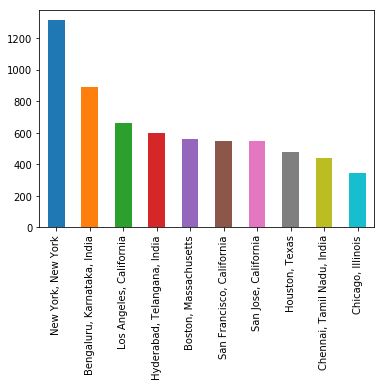

In [23]:
students_locations_top.plot.bar()

groups

In [24]:
groups.columns

Index(['groups_id', 'groups_group_type'], dtype='object')

In [25]:
groups.groups_group_type.unique()

array(['youth program', 'cause', 'professional network', 'club',
       'competition', 'mentorship program', 'interest group'],
      dtype=object)

In [26]:
groups.groups_group_type.nunique()

7

In [27]:
groups.groups_group_type.value_counts()

youth program           33
professional network     8
mentorship program       3
cause                    2
interest group           1
club                     1
competition              1
Name: groups_group_type, dtype: int64

Text(0,0.5,'')

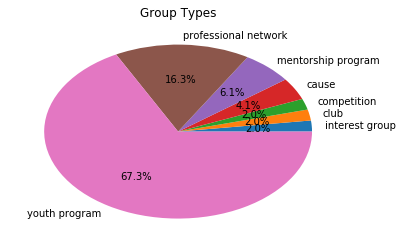

In [28]:
#groups.groups_group_type.value_counts().sort_values(ascending=True).plot.pie(title='Group Types')
groups.groups_group_type.value_counts().sort_values(ascending=True).plot(kind='pie',autopct='%1.1f%%', title='Group Types')
plt.xlabel('')
plt.ylabel('')

Text(0,0.5,'group types')

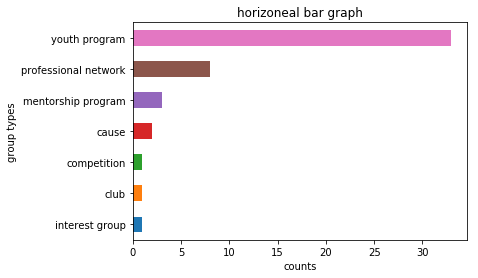

In [29]:
#groups.groups_group_type.value_counts().sort_values(ascending=True).plot.barh(title='Group Types')
groups.groups_group_type.value_counts().sort_values(ascending=True).plot(kind='barh', title='horizoneal bar graph')
plt.xlabel('counts')
plt.ylabel('group types')

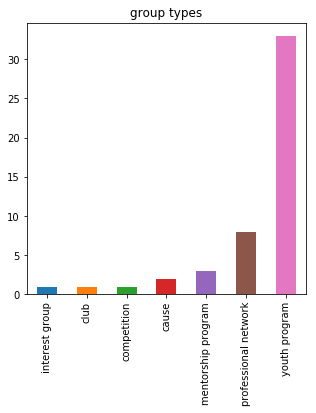

In [30]:
#groups.groups_group_type.value_counts().plot.bar()
#groups.groups_group_type.value_counts().sort_values(ascending=True).plot.bar(title='group types')
groups.groups_group_type.value_counts().sort_values(ascending=True).plot(kind='bar', title='group types', figsize=(5, 5))

In [31]:
temp = groups.groups_group_type.value_counts()
temp = temp.reset_index()

In [32]:
temp.head()

,index,groups_group_type
0,youth program,33
1,professional network,8
2,mentorship program,3
3,cause,2
4,interest group,1


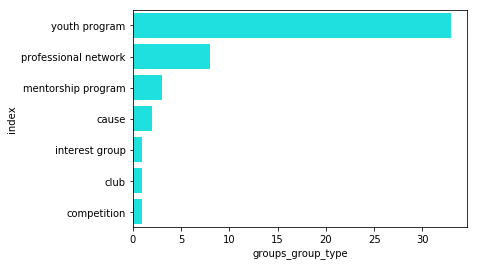

In [33]:
sns.barplot(x="groups_group_type", y='index', data=temp, color="cyan")

In [34]:
emails.head()

,emails_id,emails_recipient_id,emails_date_sent,emails_frequency_level
0,2337714,0c673e046d824ec0ad0ebe012a0673e4,2018-12-07 01:05:40,email_notification_daily
1,2336077,0c673e046d824ec0ad0ebe012a0673e4,2018-12-06 01:14:15,email_notification_daily
2,2314660,0c673e046d824ec0ad0ebe012a0673e4,2018-11-17 00:38:27,email_notification_daily
3,2312639,0c673e046d824ec0ad0ebe012a0673e4,2018-11-16 00:32:19,email_notification_daily
4,2299700,0c673e046d824ec0ad0ebe012a0673e4,2018-11-08 00:16:40,email_notification_daily


In [35]:
emails.columns

Index(['emails_id', 'emails_recipient_id', 'emails_date_sent',
       'emails_frequency_level'],
      dtype='object')

In [36]:
emails.emails_frequency_level.unique()

array(['email_notification_daily', 'email_notification_immediate',
       'email_notification_weekly'], dtype=object)

In [37]:
professionals.head()

,professionals_id,professionals_location,professionals_industry,professionals_headline,professionals_date_joined
0,9ced4ce7519049c0944147afb75a8ce3,NaN,NaN,NaN,2011-10-05 20:35:19
1,f718dcf6d2ec4cb0a52a9db59d7f9e67,NaN,NaN,NaN,2011-10-05 20:49:21
2,0c673e046d824ec0ad0ebe012a0673e4,"New York, New York",NaN,NaN,2011-10-18 17:31:26
3,977428d851b24183b223be0eb8619a8c,"Boston, Massachusetts",NaN,NaN,2011-11-09 20:39:29
4,e2d57e5041a44f489288397c9904c2b2,NaN,NaN,NaN,2011-12-10 22:14:44


In [38]:
professionals.professionals_location.nunique()

2582

In [39]:
professionals_location_top = professionals.professionals_location.value_counts().sort_values(ascending=True).head(10)
professionals_location_top

Farnborough, England, United Kingdom    1
Cumberland, Maryland                    1
Pittsfield, Massachusetts               1
West Windsor Township, New Jersey       1
Dudley, England, United Kingdom         1
Rest of Hubei, China                    1
Olney, Maryland                         1
Sheboygan, Wisconsin Area               1
Mableton, Georgia                       1
Waipahu, Hawaii                         1
Name: professionals_location, dtype: int64

Text(0,0.5,'')

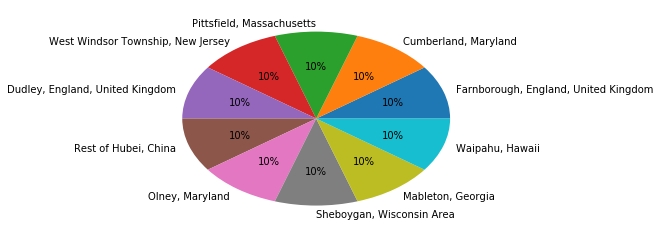

In [40]:
professionals_location_topChart = professionals_location_top.plot.pie(autopct='%1.0f%%')
plt.xlabel('')
plt.ylabel('')

In [41]:
students.head()

,students_id,students_location,students_date_joined
0,12a89e96755a4dba83ff03e03043d9c0,NaN,2011-12-16 14:19:24
1,e37a5990fe354c60be5e87376b08d5e3,NaN,2011-12-27 03:02:44
2,12b402cceeda43dcb6e12ef9f2d221ea,NaN,2012-01-01 05:00:00
3,a0f431fc79794edcb104f68ce55ab897,NaN,2012-01-01 05:00:00
4,23aea4702d804bd88d1e9fb28074a1b4,NaN,2012-01-01 05:00:00


In [42]:
school_memberships.head()

,school_memberships_school_id,school_memberships_user_id
0,197406,23dce13ca6164a73aec7a3cd56a4884d
1,197398,23dce13ca6164a73aec7a3cd56a4884d
2,199821,23dce13ca6164a73aec7a3cd56a4884d
3,186239,9c5803ae43ca4cf6b27ea85871625116
4,182063,9c5803ae43ca4cf6b27ea85871625116


In [43]:
school_memberships.school_memberships_school_id.nunique()

2706

In [44]:
questions.head()

,questions_id,questions_author_id,questions_date_added,questions_title,questions_body
0,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26,Teacher career question,What is a maths teacher? what is a ma...
1,eb80205482e4424cad8f16bc25aa2d9c,acccbda28edd4362ab03fb8b6fd2d67b,2016-05-20 16:48:25,I want to become an army officer. What can I d...,I am Priyanka from Bangalore . Now am in 10th ...
2,4ec31632938a40b98909416bdd0decff,f2c179a563024ccc927399ce529094b5,2017-02-08 19:13:38,Will going abroad for your first job increase ...,I'm planning on going abroad for my first job....
3,2f6a9a99d9b24e5baa50d40d0ba50a75,2c30ffba444e40eabb4583b55233a5a4,2017-09-01 14:05:32,To become a specialist in business management...,i hear business management is a hard way to ge...
4,5af8880460c141dbb02971a1a8369529,aa9eb1a2ab184ebbb00dc01ab663428a,2017-09-01 02:36:54,Are there any scholarships out there for stude...,I'm trying to find scholarships for first year...


In [45]:
questions.quest_added_year = questions.questions_date_added.dt.year

C:\Users\reejung\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


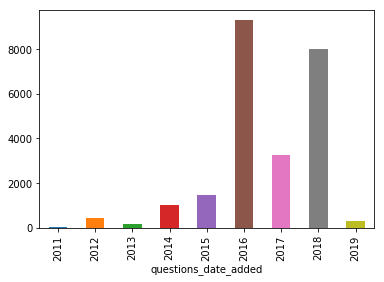

In [46]:
questions.questions_id.groupby(questions.quest_added_year).count().plot(kind='bar')

cumulated number of questions per year

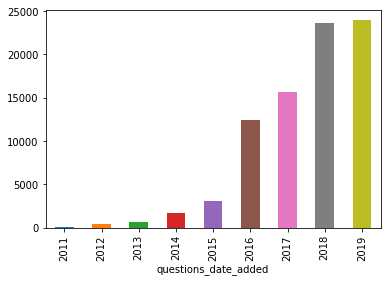

In [47]:
np.cumsum(questions.questions_id.groupby(questions.quest_added_year).count()).plot(kind='bar')

# Merging data sets

In [48]:
df = pd.merge(questions, answers, how='left', left_on='questions_id', right_on='answers_question_id')
df = pd.merge(df, tag_questions, how ='left', left_on='questions_id', right_on='tag_questions_question_id')
df = pd.merge(df, tags, how='left', left_on='tag_questions_tag_id', right_on='tags_tag_id')
df = pd.merge(df, group_memberships, how='left', left_on='answers_author_id', right_on='group_memberships_user_id')
df = pd.merge(df, groups,how='left', left_on='group_memberships_group_id', right_on='groups_id')

In [49]:
df.head().transpose()

,0,1,2,3,4
questions_id,332a511f1569444485cf7a7a556a5e54,332a511f1569444485cf7a7a556a5e54,332a511f1569444485cf7a7a556a5e54,eb80205482e4424cad8f16bc25aa2d9c,eb80205482e4424cad8f16bc25aa2d9c
questions_author_id,8f6f374ffd834d258ab69d376dd998f5,8f6f374ffd834d258ab69d376dd998f5,8f6f374ffd834d258ab69d376dd998f5,acccbda28edd4362ab03fb8b6fd2d67b,acccbda28edd4362ab03fb8b6fd2d67b
questions_date_added,2016-04-26 11:14:26,2016-04-26 11:14:26,2016-04-26 11:14:26,2016-05-20 16:48:25,2016-05-20 16:48:25
questions_title,Teacher career question,Teacher career question,Teacher career question,I want to become an army officer. What can I d...,I want to become an army officer. What can I d...
questions_body,What is a maths teacher? what is a ma...,What is a maths teacher? what is a ma...,What is a maths teacher? what is a ma...,I am Priyanka from Bangalore . Now am in 10th ...,I am Priyanka from Bangalore . Now am in 10th ...
answers_id,4e5f01128cae4f6d8fd697cec5dca60c,4e5f01128cae4f6d8fd697cec5dca60c,4e5f01128cae4f6d8fd697cec5dca60c,ada720538c014e9b8a6dceed09385ee3,ada720538c014e9b8a6dceed09385ee3
answers_author_id,36ff3b3666df400f956f8335cf53e09e,36ff3b3666df400f956f8335cf53e09e,36ff3b3666df400f956f8335cf53e09e,2aa47af241bf42a4b874c453f0381bd4,2aa47af241bf42a4b874c453f0381bd4
answers_question_id,332a511f1569444485cf7a7a556a5e54,332a511f1569444485cf7a7a556a5e54,332a511f1569444485cf7a7a556a5e54,eb80205482e4424cad8f16bc25aa2d9c,eb80205482e4424cad8f16bc25aa2d9c
answers_date_added,2016-04-29 19:40:14,2016-04-29 19:40:14,2016-04-29 19:40:14,2018-05-01 14:19:08,2018-05-01 14:19:08
answers_body,<p>Hi!</p>\n<p>You are asking a very interesti...,<p>Hi!</p>\n<p>You are asking a very interesti...,<p>Hi!</p>\n<p>You are asking a very interesti...,<p>Hi. I joined the Army after I attended coll...,<p>Hi. I joined the Army after I attended coll...


In [50]:
df.questions_date_added = pd.to_datetime(df.questions_date_added, errors='coerce')
df.quest_added_date = df.questions_date_added.dt.date

C:\Users\reejung\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


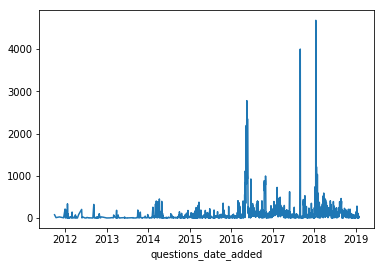

In [51]:
g1 =df.questions_id.groupby(df.quest_added_date).count()
g1.plot()

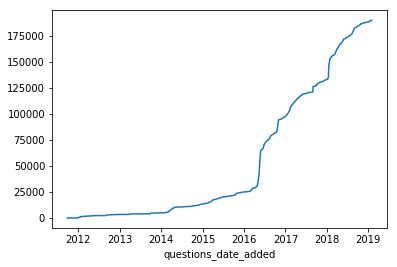

In [52]:
np.cumsum(g1).plot(kind='line')

In [53]:
df.tags_tag_name.nunique()

7091

In [54]:
top_tags = df.questions_id.groupby(df.tags_tag_name).count().sort_values(ascending=False).head(10)

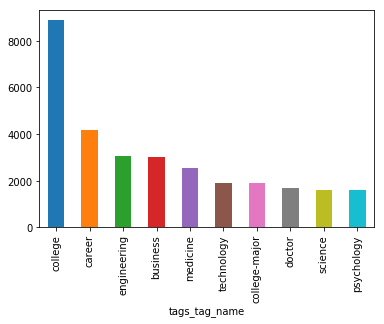

In [55]:
top_tags.plot.bar()

See how long it takes the questions to be answered

In [56]:
df['duration_answers'] = (pd.to_datetime(df.answers_date_added) - pd.to_datetime(df.questions_date_added) ).dt.days

In [57]:
df.duration_answers.describe()

count    187378.000000
mean        145.721819
std         241.196327
min          -1.000000
25%           1.000000
50%          23.000000
75%         189.000000
max        2562.000000
Name: duration_answers, dtype: float64

In [58]:
df.duration_answers.groupby(df.groups_group_type).describe()

,count,mean,std,min,25%,50%,75%,max
groups_group_type,,,,,,,,
cause,4576.0,124.492570,200.700976,0.0,1.0,21.0,156.25,958.0
club,167.0,354.790419,501.529910,0.0,18.0,199.0,483.00,2430.0
competition,266.0,79.383459,158.560564,0.0,2.0,5.0,36.75,602.0
interest group,111.0,219.621622,176.602587,0.0,101.0,139.0,356.00,552.0
mentorship program,302.0,300.569536,377.468100,0.0,43.0,189.0,400.00,2430.0
professional network,1251.0,210.270983,254.746759,0.0,8.0,98.0,325.00,1449.0
youth program,25128.0,167.695320,299.762578,0.0,0.0,16.0,195.00,2430.0


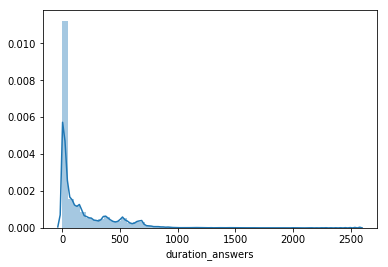

In [59]:
sns.distplot(df.duration_answers.dropna())

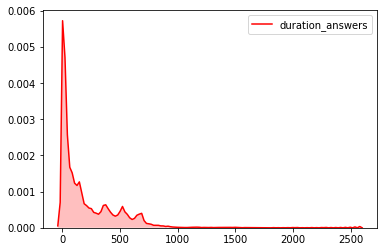

In [60]:
sns.kdeplot(df.duration_answers.dropna(), shade=True, color='r')

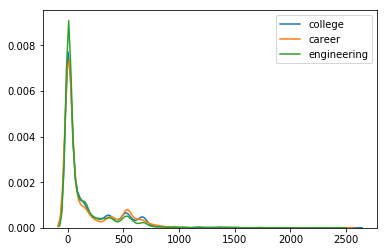

In [61]:
sns.kdeplot(df.duration_answers.dropna()[df.tags_tag_name=='college'], label='college', shade=False)
sns.kdeplot(df.duration_answers.dropna()[df.tags_tag_name=='career'], label='career', shade=False)
sns.kdeplot(df.duration_answers.dropna()[df.tags_tag_name=='engineering'], label='engineering', shade=False)

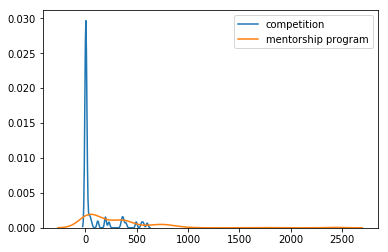

In [62]:
sns.kdeplot(df.duration_answers.dropna()[df.groups_group_type=='competition'], label='competition')
#sns.kdeplot(df.duration_answers.dropna()[df.groups_group_type=='youth program'], label='youth program')
sns.kdeplot(df.duration_answers.dropna()[df.groups_group_type=='mentorship program'], label='mentorship program')

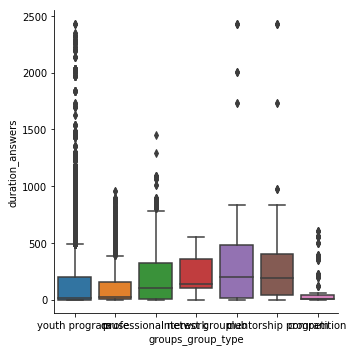

In [65]:
sns.catplot(x="groups_group_type", y="duration_answers",kind='box', data=df)

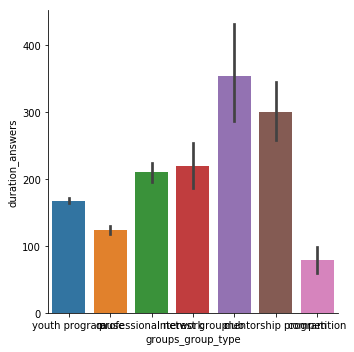

In [66]:
sns.catplot(x="groups_group_type", y="duration_answers", kind='bar', data=df)